In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error



# Creating a Web page

In [203]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


#Load the Data

In [220]:
data = pd.read_csv("/Users/elsonluis/Desktop/Final Project - IronHack/Streamlit/world-data-2023.csv", decimal=',')
data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.93911,67.709953
1,Albania,105.0,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.2,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18.0,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164.0,AD,40.00%,468,NaN,7.2,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26.0,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.42375,-66.58973
191,Vietnam,314.0,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56.0,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25.0,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [206]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [200]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()
     

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [148]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

/var/folders/3g/cbmc9mq12pg8d2rz5v_htfs00000gn/T/ipykernel_92709/2346370292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
/var/folders/3g/cbmc9mq12pg8d2rz5v_htfs00000gn/T/ipykernel_92709/2346370292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
/var/folders/3g/cbmc9mq12pg8d2rz5v_htfs00000gn/T/ipykernel_92709/2346370292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

# Data Exploratory

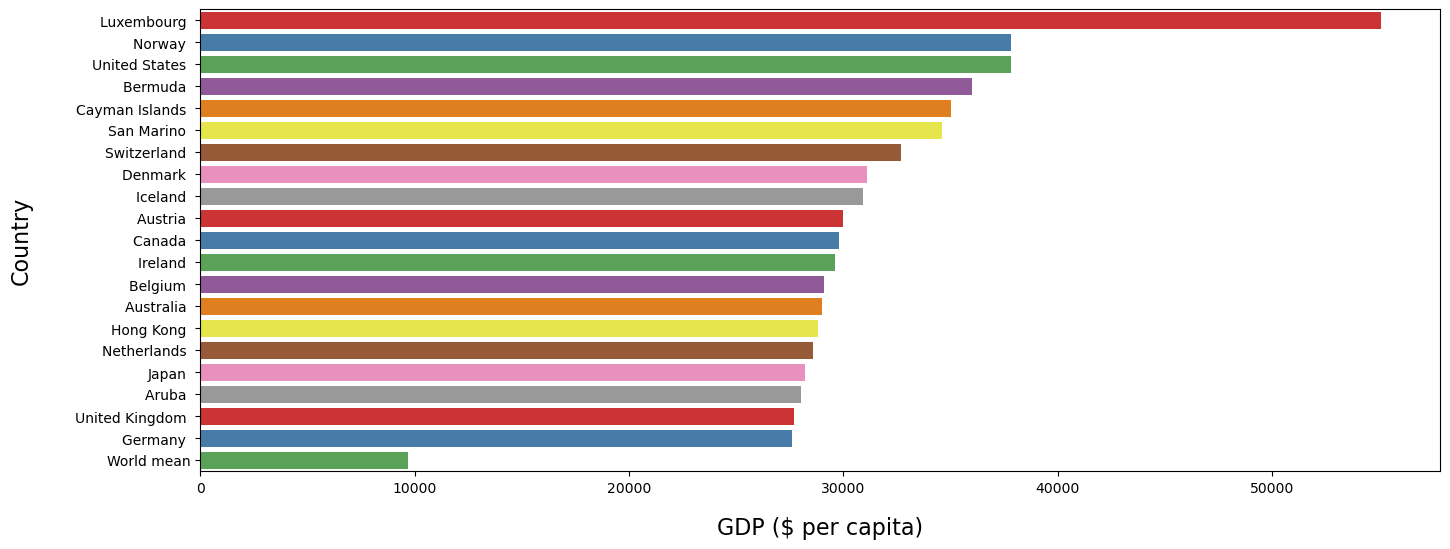

In [187]:
# Top 20 Countries with highest GDP per capita
fig, ax = plt.subplots(figsize=(16, 6))
top_gdp_countries = data.sort_values('GDP ($ per capita)', ascending=False).head(20)
mean = pd.DataFrame({'Country': ['World mean'], 'GDP ($ per capita)': [data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country', 'GDP ($ per capita)']], mean], ignore_index=True)

sns.barplot(x='GDP ($ per capita)', y='Country', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.show()


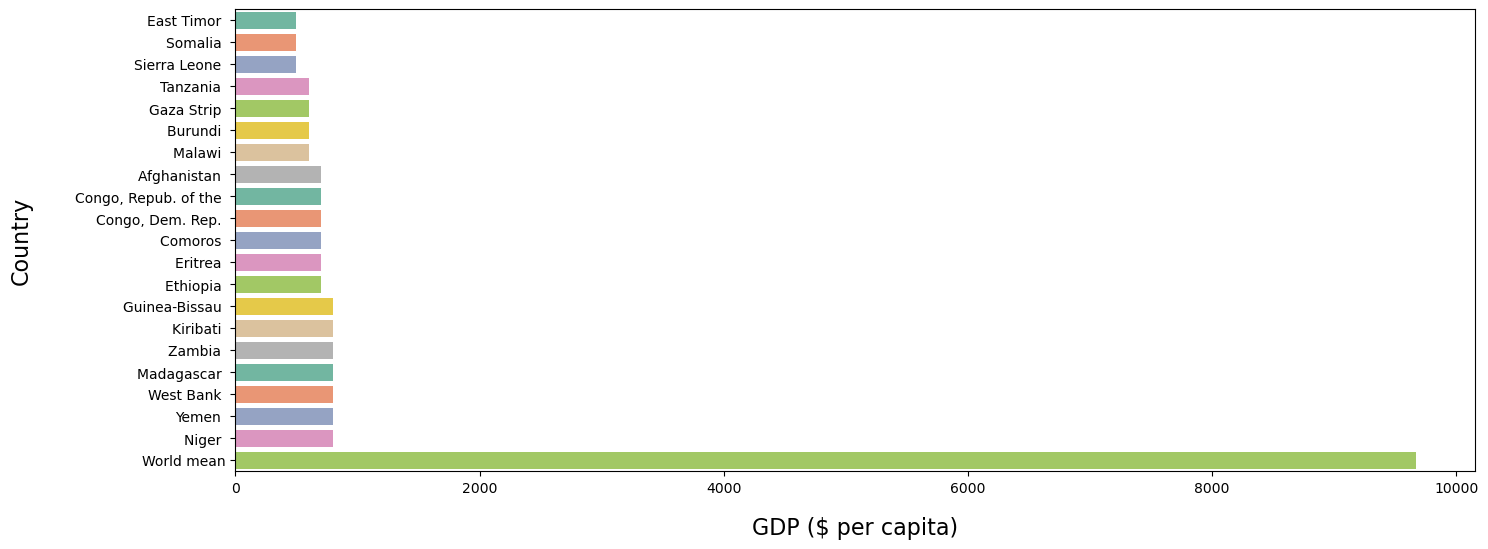

In [150]:
# Top 20 Countries with lowest GDP per capita
fig, ax = plt.subplots(figsize=(16, 6))
bottom_gdp_countries = data.sort_values('GDP ($ per capita)').head(20)
mean = pd.DataFrame({'Country': ['World mean'], 'GDP ($ per capita)': [data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([bottom_gdp_countries[['Country', 'GDP ($ per capita)']], mean], ignore_index=True)

sns.barplot(x='GDP ($ per capita)', y='Country', data=gdps, palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.show()


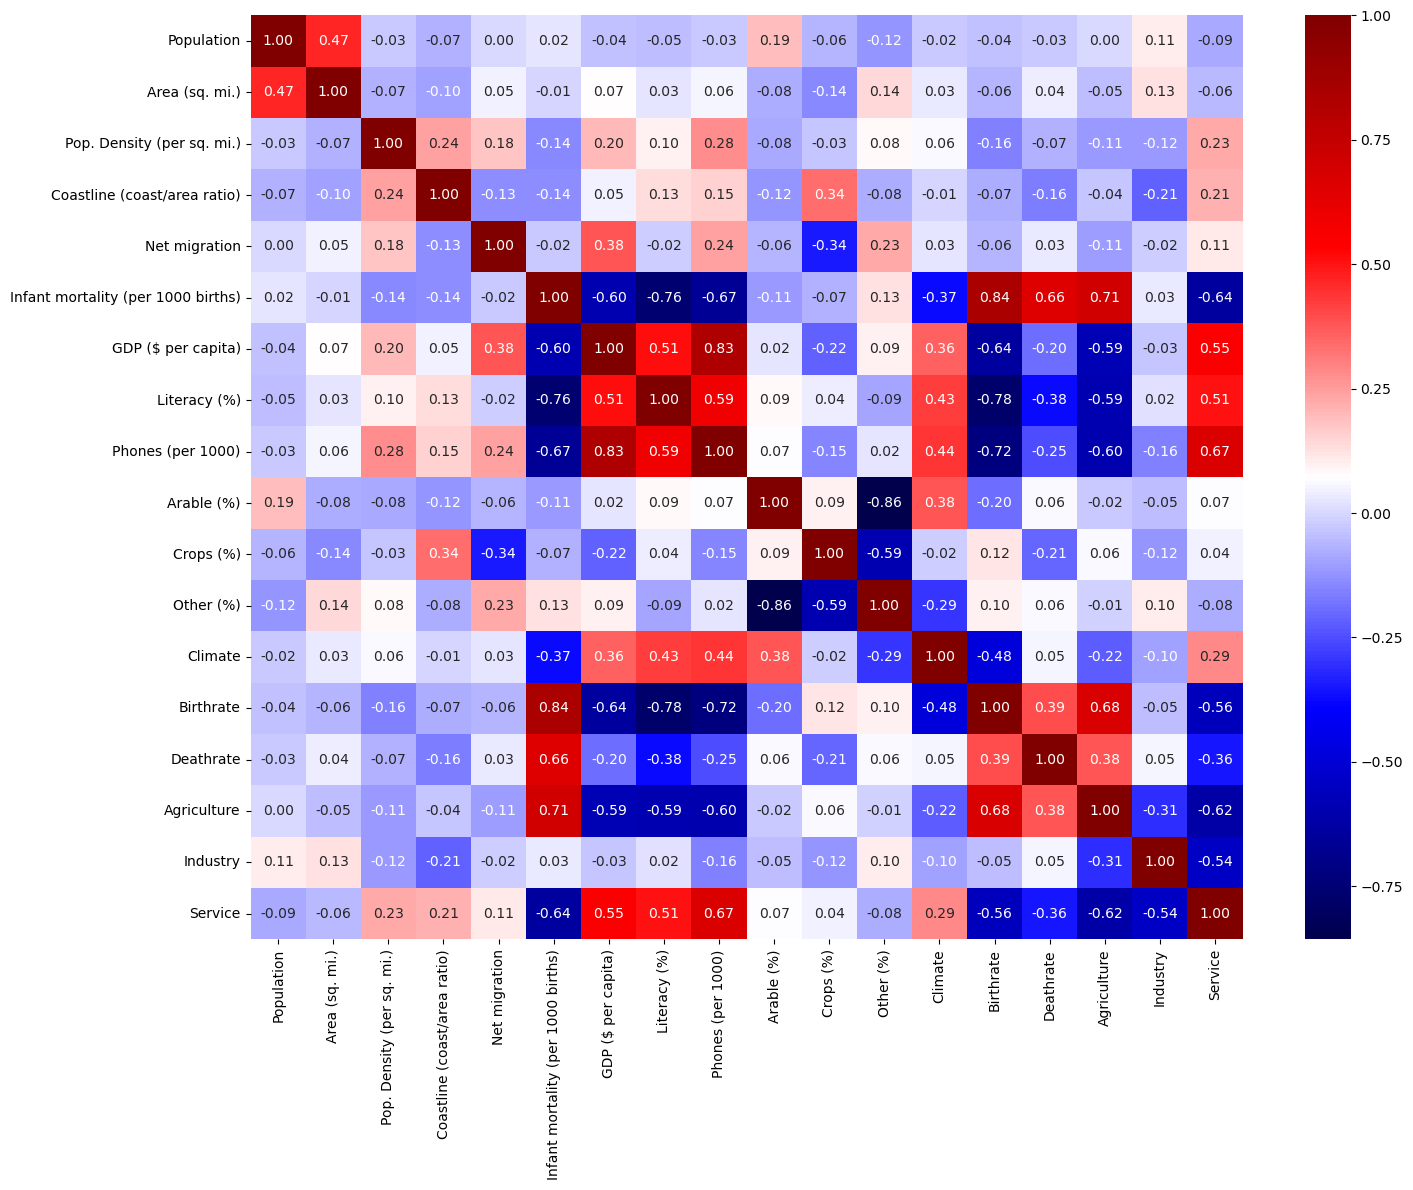

In [151]:

# heatmap to shows the correlation between all numerical columns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='seismic')
plt.show()

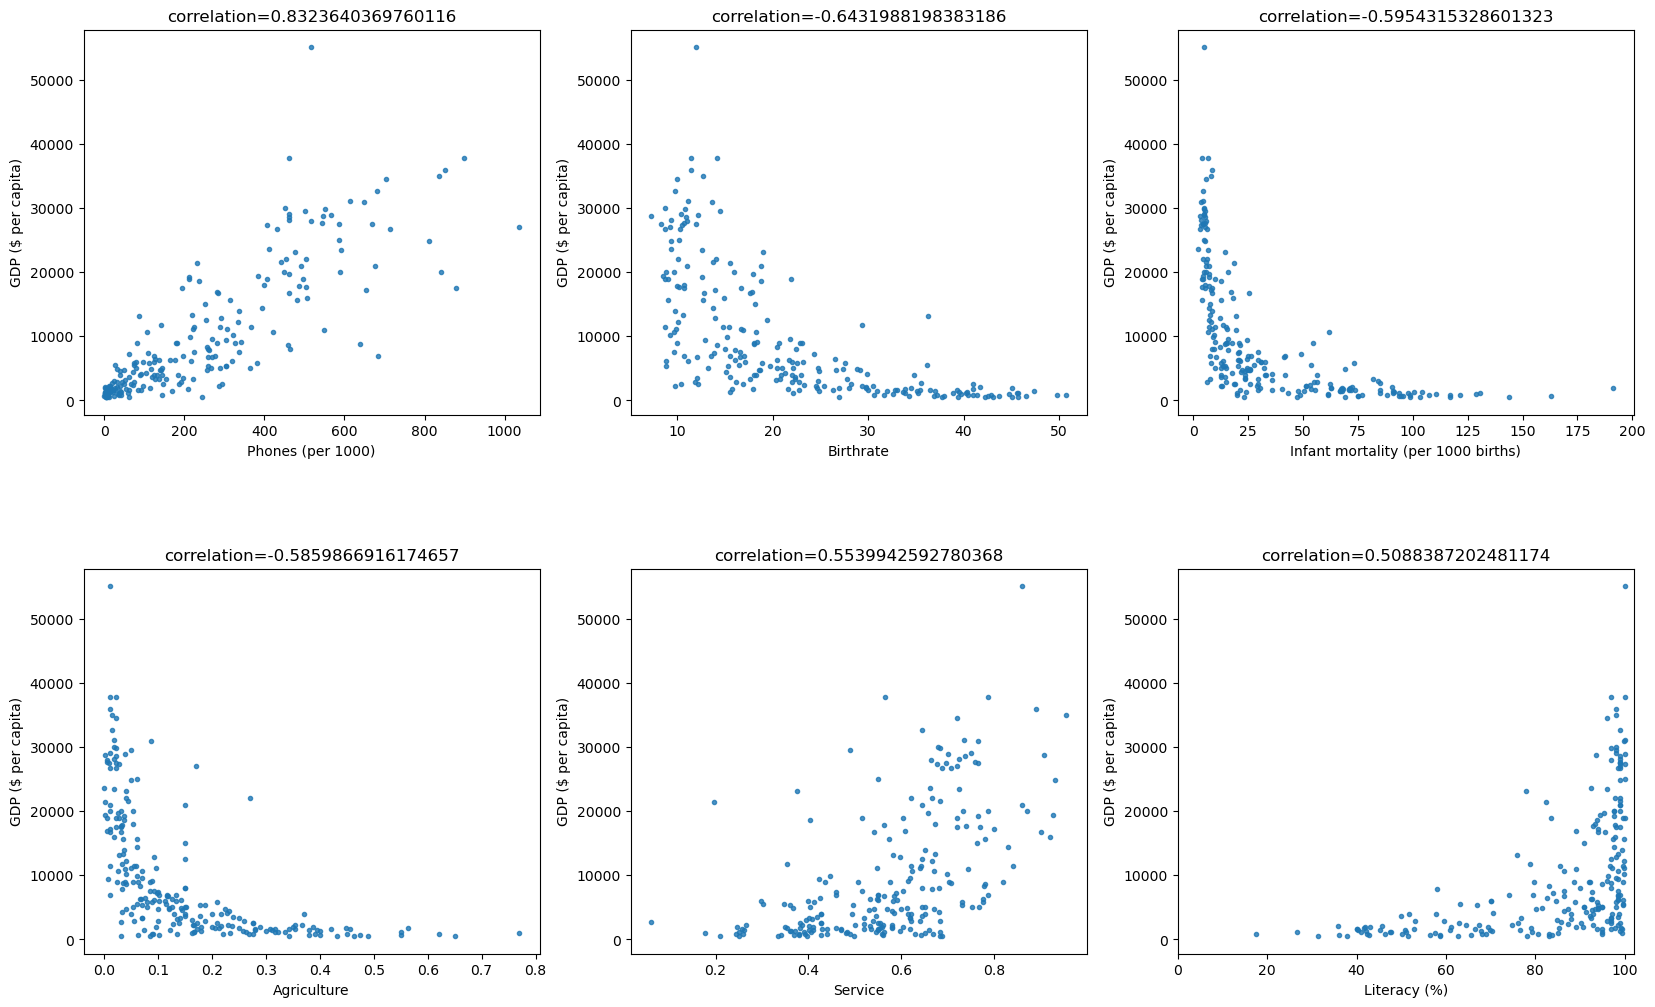

In [152]:
# Top Factors affecting GDP per capita
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()
     

Não há nenhum país com o literacia começa nos 20....(literacia impírica) é provavel, ONU

In [195]:

# Countries with low Birthrate and low GDP per capita
presentation = data.loc[(data['Birthrate']<14)&(data['GDP ($ per capita)']<10000)]
presentation

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,NaN,9.95,14.65,0.054,0.371,0.575


In [196]:
# Save the presentation data to a CSV file
presentation_csv_path = '/Users/elsonluis/Desktop/Final Project - IronHack/Streamlit/presentation_data.csv'
presentation.to_csv(presentation_csv_path, index=False)

In [197]:

LE = LabelEncoder()
data['Region_label'] = LE.fit_transform(data['Region'])
data['Climate_label'] = LE.fit_transform(data['Climate'])
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,10,4


# Trainings and test

è verdade que o score represata isoo mas os países são diferentes

In [155]:

# Training and Testing the data
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [233]:
# linear regression model
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

print("r^2 train", model.score(train_X, train_Y))
print("r^2 test", model.score(test_X, test_Y))

rmse_train: 4639.977660503952 msle_train: 4.653979066444029
rmse_test: 6066.194629557118 msle_test: 10.989773460083724
r^2 train 0.7749489330463077
r^2 test 0.622010158222148


In [157]:
print(model.score(train_X, train_Y))
print(model.score(test_X, test_Y))

0.7749489330463077
0.622010158222148


In [232]:
# Random forest model.
model = RandomForestRegressor(n_estimators = 10,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.5,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
trainpred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
testpred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(trainpred_Y, train_Y))

rmse_test = np.sqrt(mean_squared_error(testpred_Y, test_Y))


print('rmse_train:',rmse_train)
print('rmse_test:',rmse_test)

print(model.score(train_X, train_Y))
print(model.score(test_X, test_Y))

rmse_train: 7043.272490831647
rmse_test: 6532.117038438748
0.4993829381394109
0.5840460470019595


In [234]:
## The best test

print(model.score(train_X, train_Y))
print(model.score(test_X, test_Y))

0.7749489330463077
0.622010158222148


In [229]:
print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 7043.272490831647 msle_train: 4.653979066444029
rmse_test: 6532.117038438748 msle_test: 10.989773460083724


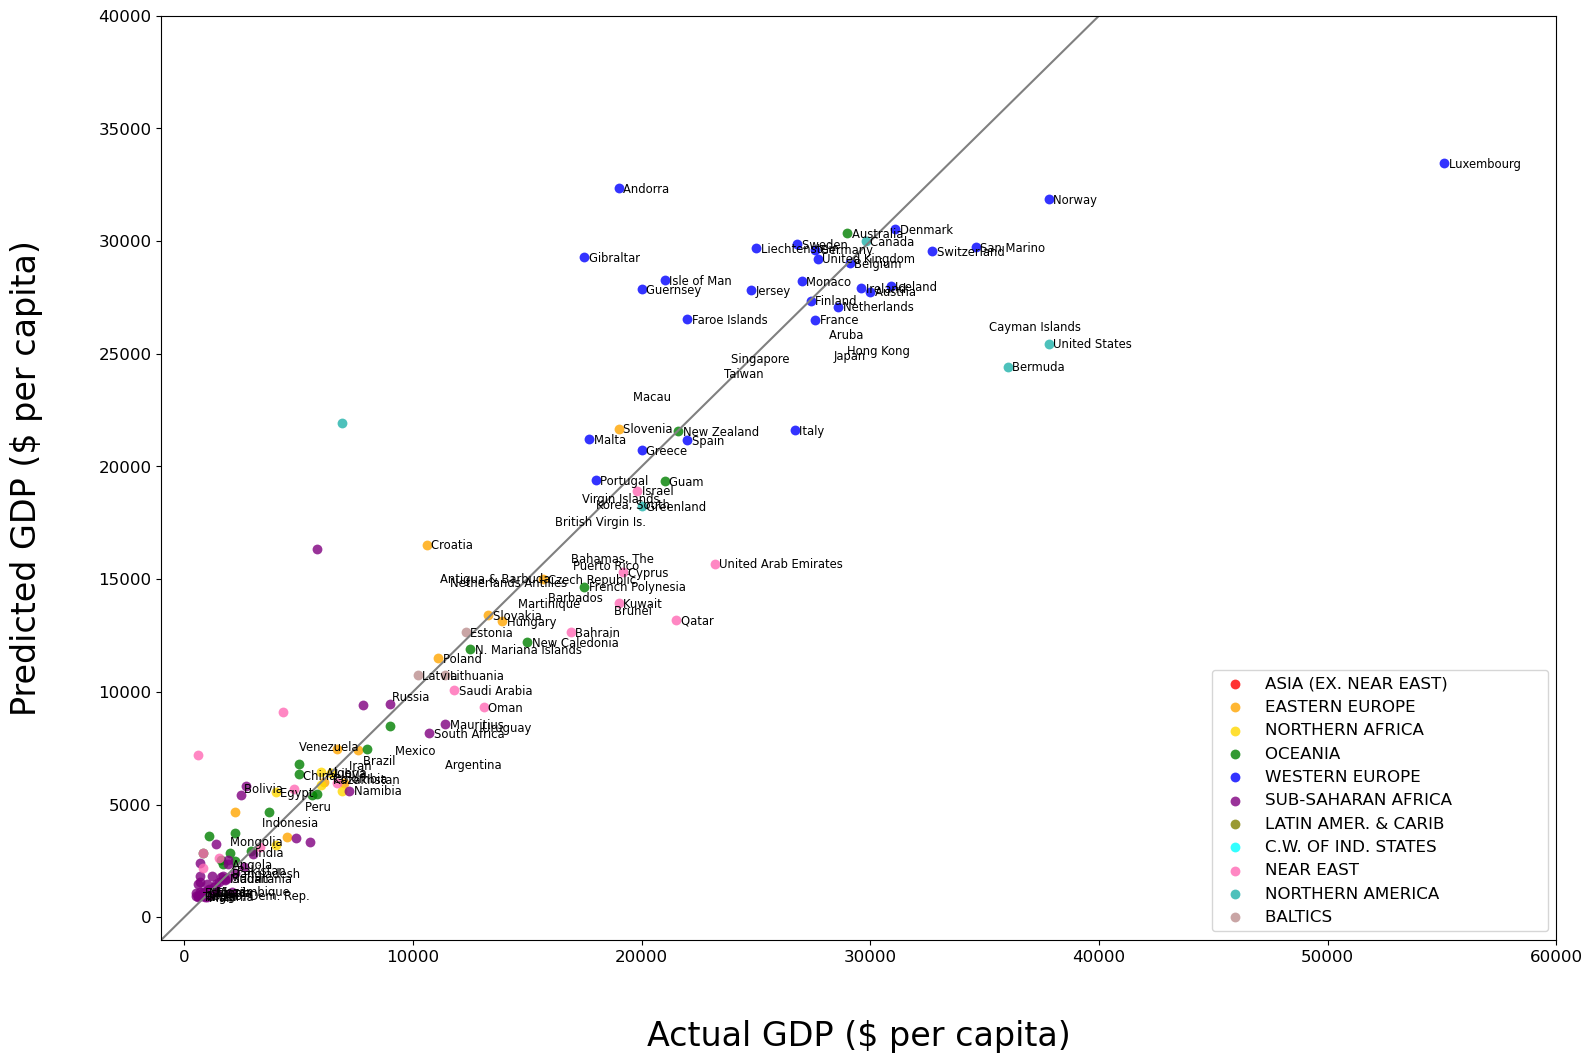

In [160]:
# Visualization of Results
plt.figure(figsize=(18, 12))

train_test_Y = pd.concat([train_Y, test_Y])
train_test_pred_Y = pd.concat([train_pred_Y, test_pred_Y])

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)               ': 'red',
          'EASTERN EUROPE                     ': 'orange',
          'NORTHERN AFRICA                    ': 'gold',
          'OCEANIA                            ': 'green',
          'WESTERN EUROPE                     ': 'blue',
          'SUB-SAHARAN AFRICA                 ': 'purple',
          'LATIN AMER. & CARIB                ': 'olive',
          'C.W. OF IND. STATES                ': 'cyan',
          'NEAR EAST                          ': 'hotpink',
          'NORTHERN AMERICA                   ': 'lightseagreen',
          'BALTICS                            ': 'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region'] == region]
    Y = train_test_pred_Y.loc[data_shuffled['Region'] == region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s': 200, 'linewidths': 0},
                     label=region)

plt.legend(loc=4, prop={'size': 12})

ax.set_xlabel('Actual GDP ($ per capita)', labelpad=40)
ax.set_ylabel('Predicted GDP ($ per capita)', labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000, 50000, 100)  # 100 linearly spaced numbers
y = x
plt.plot(x, y, c='gray')

plt.xlim(-1000, 60000)
plt.ylim(-1000, 40000)

for i in range(0, train_test_Y.shape[0]):
    if ((data_shuffled['Area (sq. mi.)'].iloc[i] > 8e5) |
            (data_shuffled['Population'].iloc[i] > 1e8) |
            (data_shuffled['GDP ($ per capita)'].iloc[i] > 10000)):
        plt.text(train_test_Y.iloc[i] + 200, train_test_pred_Y.iloc[i] - 200, label.iloc[i], size='small')


# Analyzing the total GDP based on other parameters

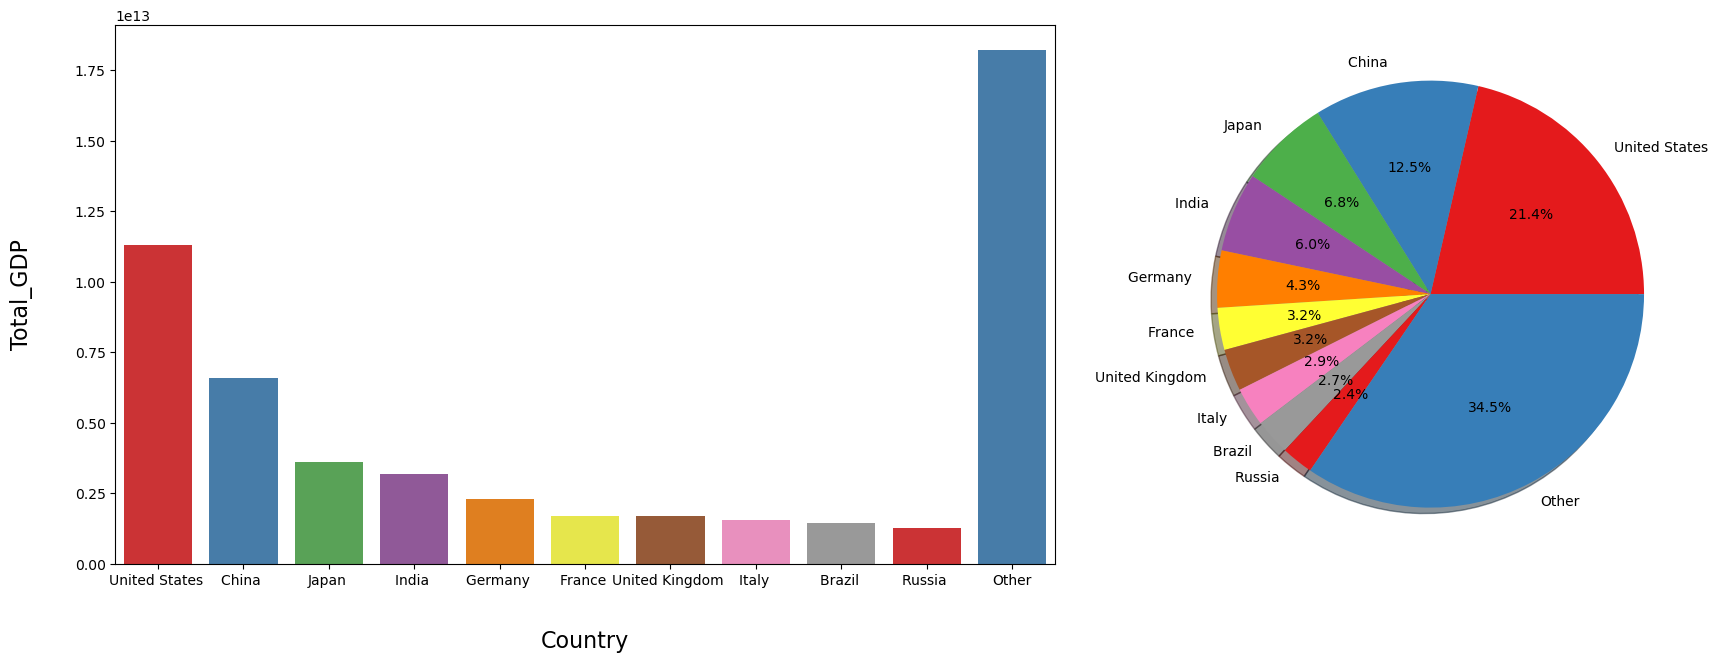

In [161]:
# Top 10 Coutries with highest total GDPs
data['Total_GDP ($)'] = data['GDP ($ per capita)'] * data['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set1')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set1", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

In [162]:
# Compared the above ten countries rank in total GDP and GDP per capita
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = data[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Rank of Total GDP - Rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

Rank of Total GDP - Rank of GDP per capita:


Country
United States        1
China              118
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

In [163]:
# Factors affecting Total GDP
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')):
        corr_to_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Population                            0.639528
Area (sq. mi.)                        0.556396
Phones (per 1000)                     0.233484
Birthrate                            -0.166889
Agriculture                          -0.139516
Arable (%)                            0.129928
Climate_label                         0.125791
Infant mortality (per 1000 births)   -0.122076
Literacy (%)                          0.099417
Service                               0.085096
Region_label                         -0.079745
Crops (%)                            -0.077078
Coastline (coast/area ratio)         -0.065211
Other (%)                            -0.064882
Net migration                         0.054632
Industry                              0.050399
Deathrate                            -0.035820
Pop. Density (per sq. mi.)           -0.028487
dtype: float64


/var/folders/3g/cbmc9mq12pg8d2rz5v_htfs00000gn/T/ipykernel_92709/1289885674.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=0.1)


TypeError: '_ColorPalette' object is not callable

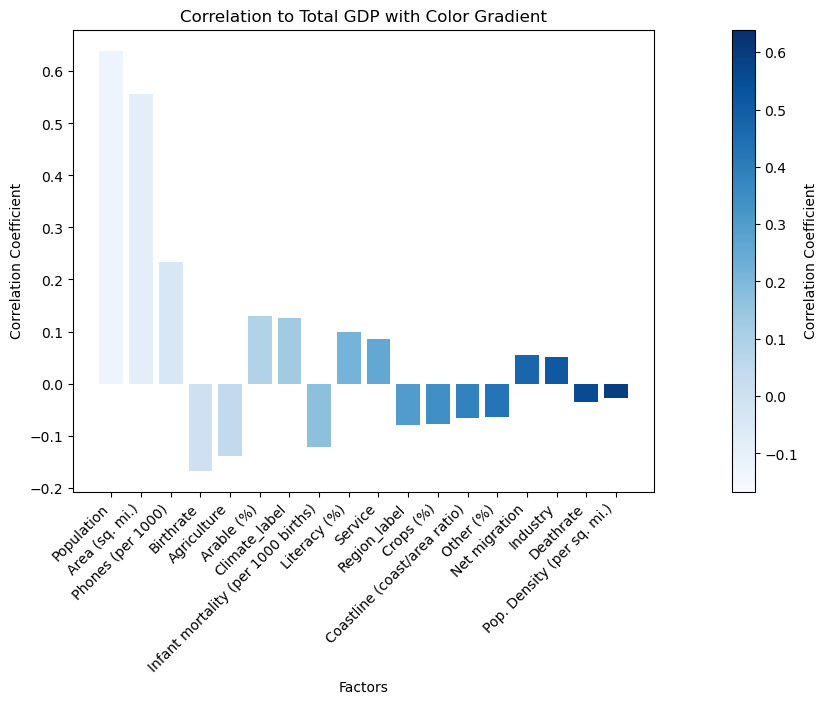

In [218]:
# Factors affecting Total GDP Plot
cmap = sns.color_palette("Blues", len(corr_to_gdp))


plt.figure(figsize=(10, 6))
bars = plt.bar(corr_to_gdp.index, corr_to_gdp, color=cmap)

sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=corr_to_gdp.min(), vmax=corr_to_gdp.max()))
sm.set_array([]) 
cbar = plt.colorbar(sm, pad=0.1)
cbar.set_label('Correlation Coefficient')


plt.title('Correlation to Total GDP with Color Gradient')
plt.xlabel('Factors')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  


for bar, corr_val in zip(bars, corr_to_gdp):
    bar.set_color(cmap(corr_val))

plt.tight_layout()
plt.show()

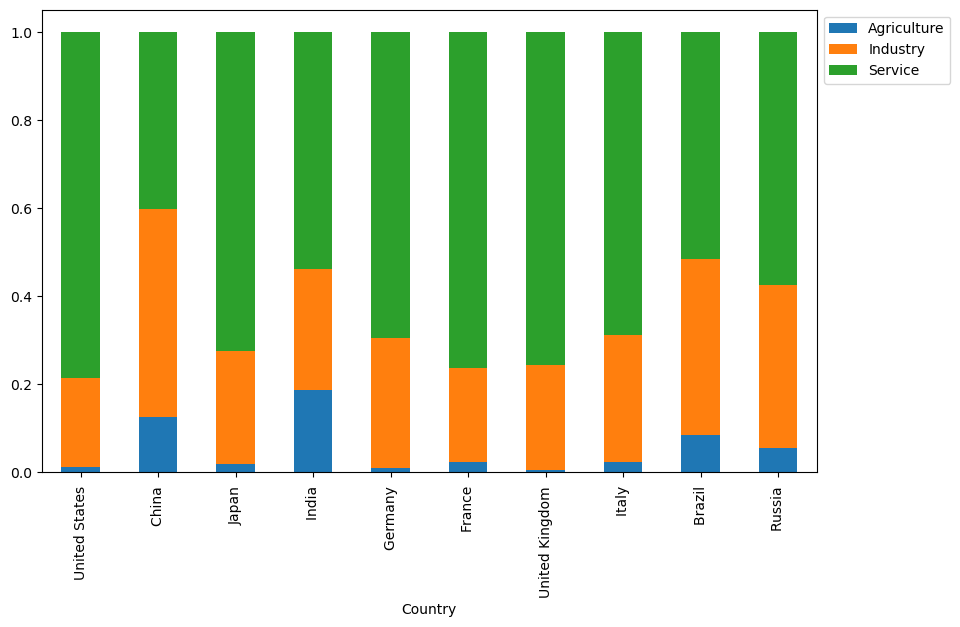

In [164]:
# Comparison of the economy structure for the Top 10
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

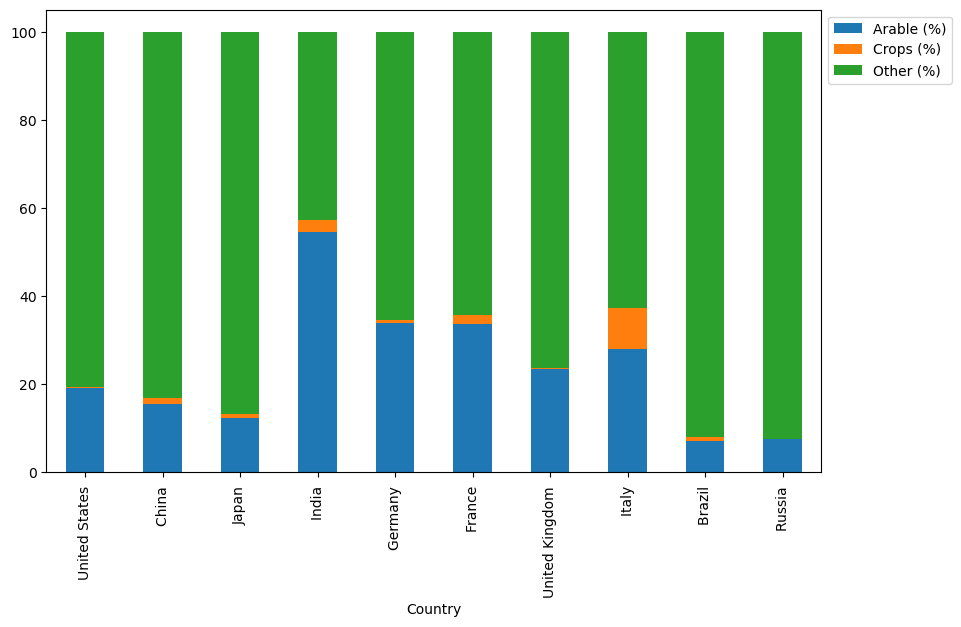

In [165]:
# Comparison of land usage for the Top 10
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()